In [174]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [175]:
#read in csv
def read_csv(path, strDate, strDateFormat):
    intSuccess = 0
    if strDateFormat != '':
        df = pd.read_csv(path, delimiter=',')
        df = df.iloc[0:35]
        df[strDate] = pd.to_datetime(datetime.strptime(df[strDate]+strDateFormat), '%Y-%m-%d')
        df.set_index(strDate, drop=True, inplace=True)

    else:
        df = pd.read_csv(path,delimiter=',',parse_dates = True,
            infer_datetime_format = True,
            index_col = strDate
            )
        df.index = pd.to_datetime(df.index, format='%Y-%m')
    if df.count != 0:
        intSuccess = 1
    return df, intSuccess

In [176]:
def create_Monthly_Avg(path, strDate, idxColumn):
    df = pd.read_csv(path,delimiter=',')
    df['YearMonth'] = pd.to_datetime(df[strDate]).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
    df['YearMonth'] =pd.to_datetime(df.YearMonth)
    res = df.groupby('YearMonth')[idxColumn].mean()
    return res

In [177]:
def show_plot_twoYs (df, colName0, colName1, colName2, fileName):
    #create two axis
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots(figsize=(30,10))
    # make a plot
    ax.plot(df.index, df[colName1], color="red", marker="o")
    # set x-axis label
    ax.set_xlabel('Date',fontsize=14)
    # set y-axis label
    ax.set_ylabel(colName1,color="red",fontsize=14)
    
    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(df.index, df[colName2],color="blue",marker="o")
    ax2.set_ylabel(colName2,color="blue",fontsize=14)
    plt.show()
    # save the plot as a file
    fig.savefig(fileName + '.jpg',
                format='jpeg',
                dpi=100,
                bbox_inches='tight')

In [178]:
#read in crude price
strFile = 'crude_wti_futures_history_data.csv'
# # p = Path('../Data')
# print(os.getcwd())
# # print(sys.argv[0])
# print(os.path.dirname(os.path.realpath('__file__')))
# base_path = os.getcwd()
base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
p = base_path + "\\data\\"
print(p)
dfMonlthlyPrices = create_Monthly_Avg(Path(p,strFile), 'Date', ['Price','Open','High','Low','Vol.'])

C:\Users\James McClure\Oil_Price_Prediction\data\


In [179]:
#read in GDP compare data and join
strFile = 'US_GDP_Monthly.csv'
# base_path = os.getcwd()
# p = base_path + "\\data\\"
base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
p = base_path + "\\data\\"
# dfJoining, intSuccess = read_csv(Path(p,strFile), 'DATE', '')
dfJoining = create_Monthly_Avg(Path(p,strFile), 'DATE', 'USALORSGPNOSTSAM')

In [180]:
#concat monthly price and gdp
joined_GDP_df = pd.concat([dfMonlthlyPrices, dfJoining], axis=1)
whereNotNull = joined_GDP_df.loc['2001-09':'2020-02']
whereNotNull.head()

,Price,Open,High,Low,USALORSGPNOSTSAM
YearMonth,,,,,
2001-09-01,22.474000,23.138000,23.602000,21.612000,99.329009
2001-10-01,22.212609,22.331739,22.693478,21.868696,99.207792
2001-11-01,19.668000,19.813500,20.303000,19.116500,99.129836
2001-12-01,19.403684,19.360000,19.917368,18.910000,99.091538
2002-01-01,19.729048,19.793810,20.191429,19.297619,99.080112


In [181]:
#establish correlation
corrrelation    = whereNotNull.corr(method='pearson'); #'kendall', 'spearman', 'pearson'
print("Pearson correlation coefficient:");
print(corrrelation['USALORSGPNOSTSAM']);
#very low correlation; pearson showed the highest

Pearson correlation coefficient:
Price               0.314892
Open                0.315054
High                0.314254
Low                 0.316303
USALORSGPNOSTSAM    1.000000
Name: USALORSGPNOSTSAM, dtype: float64


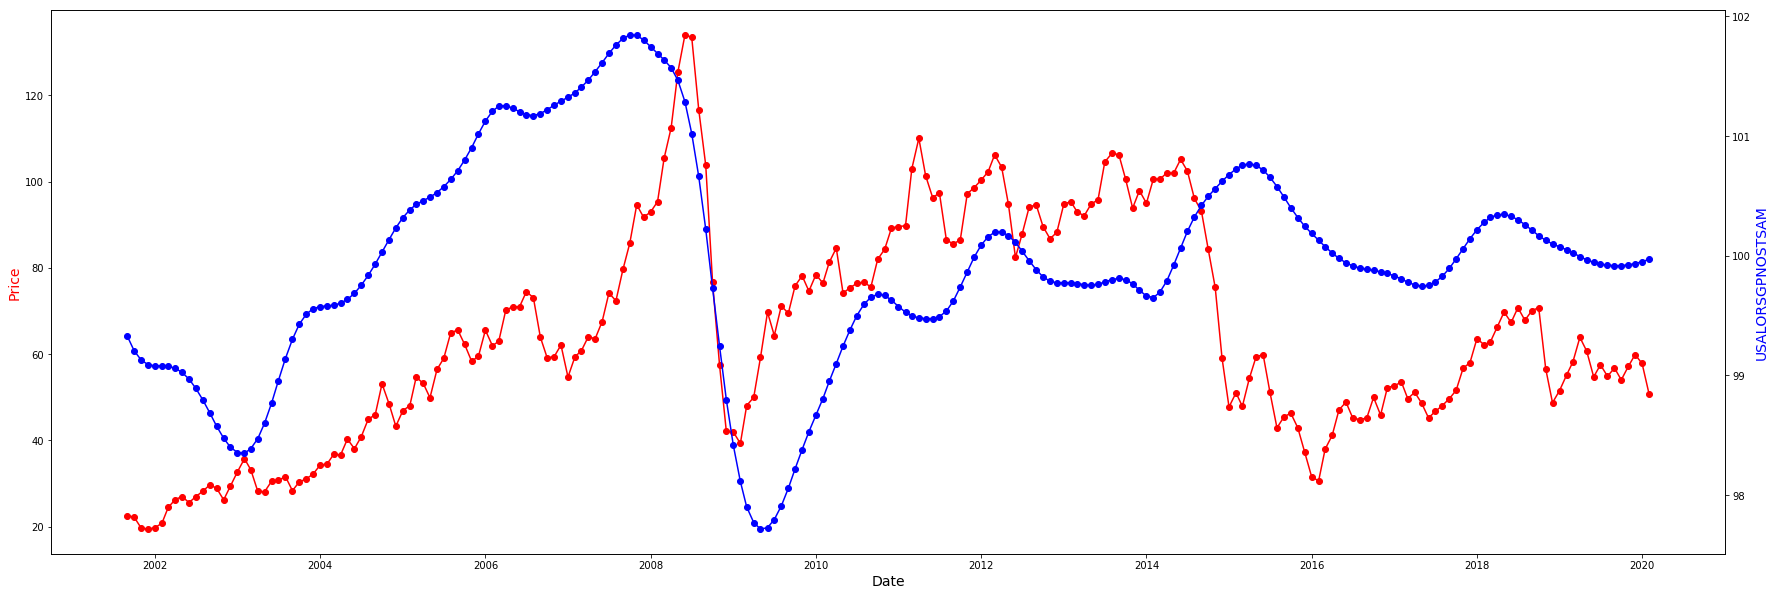

In [182]:
#check table shape
whereNotNull.head(10)
#plot the data
show_plot_twoYs (whereNotNull, whereNotNull.index, 'Price', 'USALORSGPNOSTSAM', 'GDP')

In [183]:
#read in US Oil Production compare data
strFile = 'us-crude-oil-production-historical-chart.csv'
# base_path = os.getcwd()
# p = base_path + "\\data\\"
base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
p = base_path + "\\data\\"
dfJoining = create_Monthly_Avg(Path(p,strFile), 'date', 'value')

In [184]:
#concat oil prod and price monthly data
joined_Oil_Production_df = pd.concat([dfMonlthlyPrices, dfJoining], axis=1)
whereNotNull = joined_Oil_Production_df.loc['2001-09':'2020-02']
whereNotNull.head()

,Price,Open,High,Low,value
YearMonth,,,,,
2001-09-01,22.474000,23.138000,23.602000,21.612000,5735
2001-10-01,22.212609,22.331739,22.693478,21.868696,5879
2001-11-01,19.668000,19.813500,20.303000,19.116500,5873
2001-12-01,19.403684,19.360000,19.917368,18.910000,5902
2002-01-01,19.729048,19.793810,20.191429,19.297619,5909


In [185]:
#establish correlation
corrrelation    = whereNotNull.corr(method='pearson'); #'kendall', 'spearman', 'pearson'
print("Pearson correlation coefficient:");
print(corrrelation['value']);
#very low correlation; pearson showed the highest; 1 = perfect positive correlation; -1 perfect negative correlation

Pearson correlation coefficient:
Price   -0.111260
Open    -0.110248
High    -0.113843
Low     -0.106842
value    1.000000
Name: value, dtype: float64


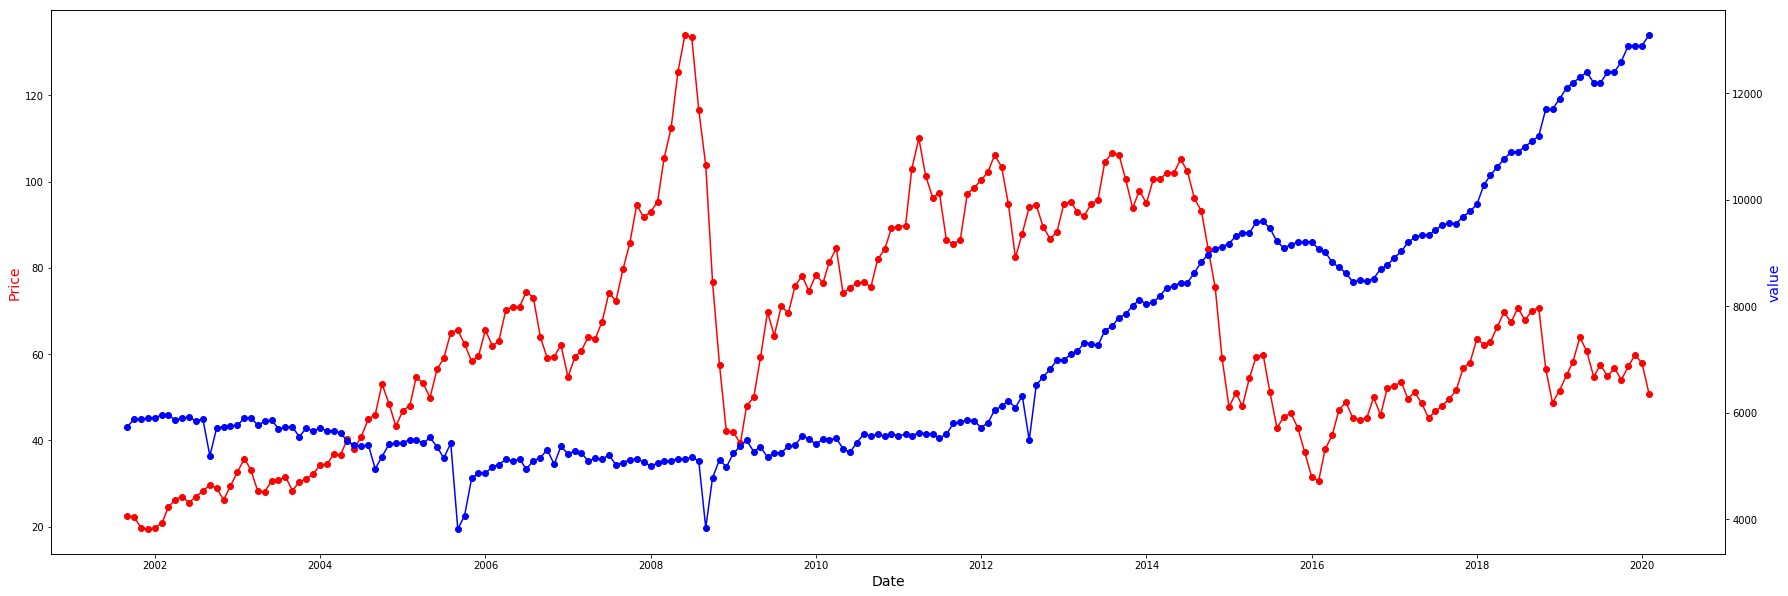

In [186]:
#check table shape
# joined_Oil_Production_df.info
#plot the data
show_plot_twoYs (whereNotNull, whereNotNull.index, 'Price', 'value', 'OilProduction')

In [187]:
#read in US Housing Starts compare data
strFile = 'housing-starts-historical-chart.csv'
# base_path = os.getcwd()
# p = base_path + "\\data\\"
base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
p = base_path + "\\data\\"
dfJoining = create_Monthly_Avg(Path(p,strFile), 'date', 'value')
# print(dfJoining.head())

In [188]:
#inner join on index
joined_Housing_Starts_df= pd.merge(dfMonlthlyPrices, dfJoining, left_index=True, right_index=True, how='inner')
joined_Housing_Starts_df.head() 

,Price,Open,High,Low,value
YearMonth,,,,,
2001-09-01,22.474000,23.138000,23.602000,21.612000,1562
2001-10-01,22.212609,22.331739,22.693478,21.868696,1540
2001-11-01,19.668000,19.813500,20.303000,19.116500,1602
2001-12-01,19.403684,19.360000,19.917368,18.910000,1568
2002-01-01,19.729048,19.793810,20.191429,19.297619,1698


In [189]:
#establish correlation
corrrelation    = joined_Housing_Starts_df.corr(method='pearson'); #'kendall', 'spearman', 'pearson'
print("Pearson correlation coefficient:");
print(corrrelation['value']);
#very low correlation; pearson showed the highest; 1 = perfect positive correlation; -1 perfect negative correlation

Pearson correlation coefficient:
Price   -0.568777
Open    -0.570265
High    -0.574720
Low     -0.563878
value    1.000000
Name: value, dtype: float64


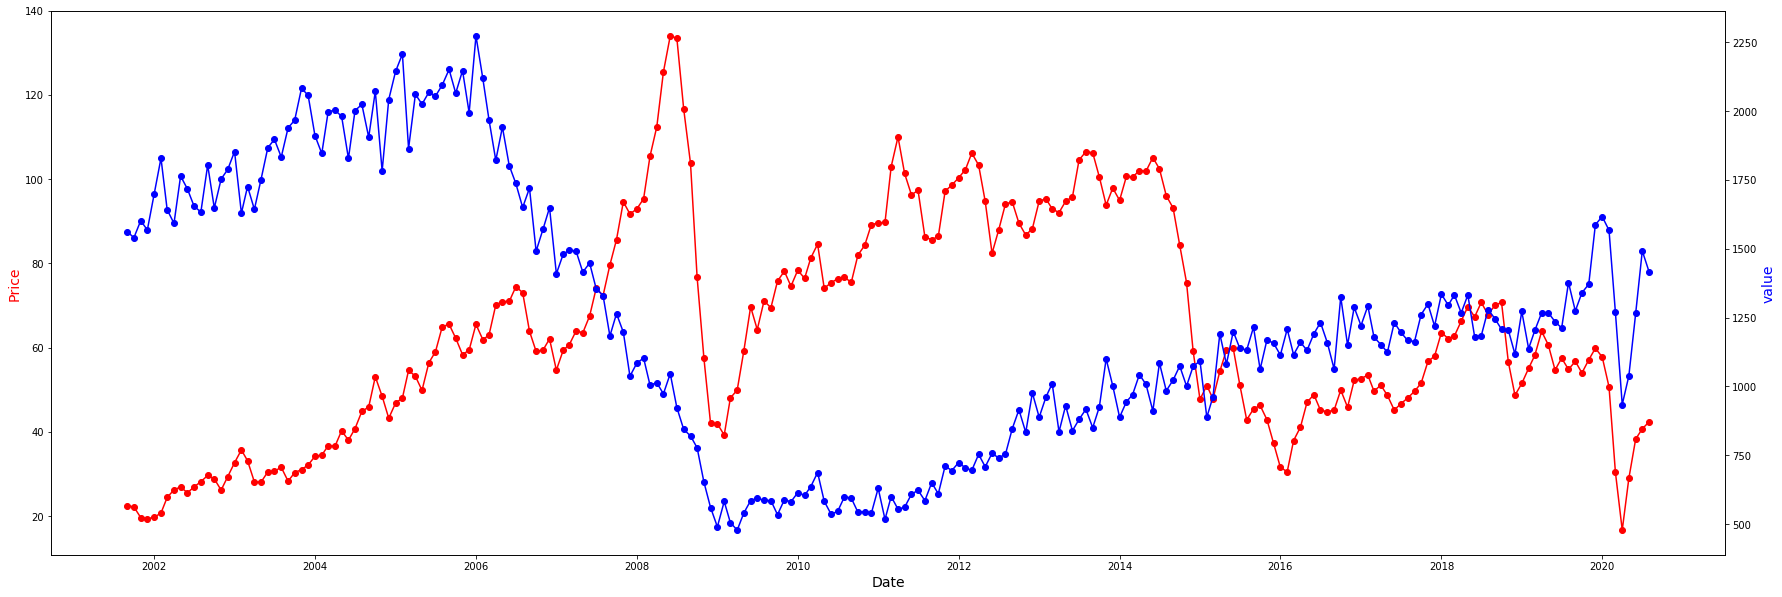

In [190]:
#check table shape
joined_Housing_Starts_df.info
#plot the data
show_plot_twoYs (joined_Housing_Starts_df, joined_Housing_Starts_df.index, 'Price', 'value', 'HousingStarts')